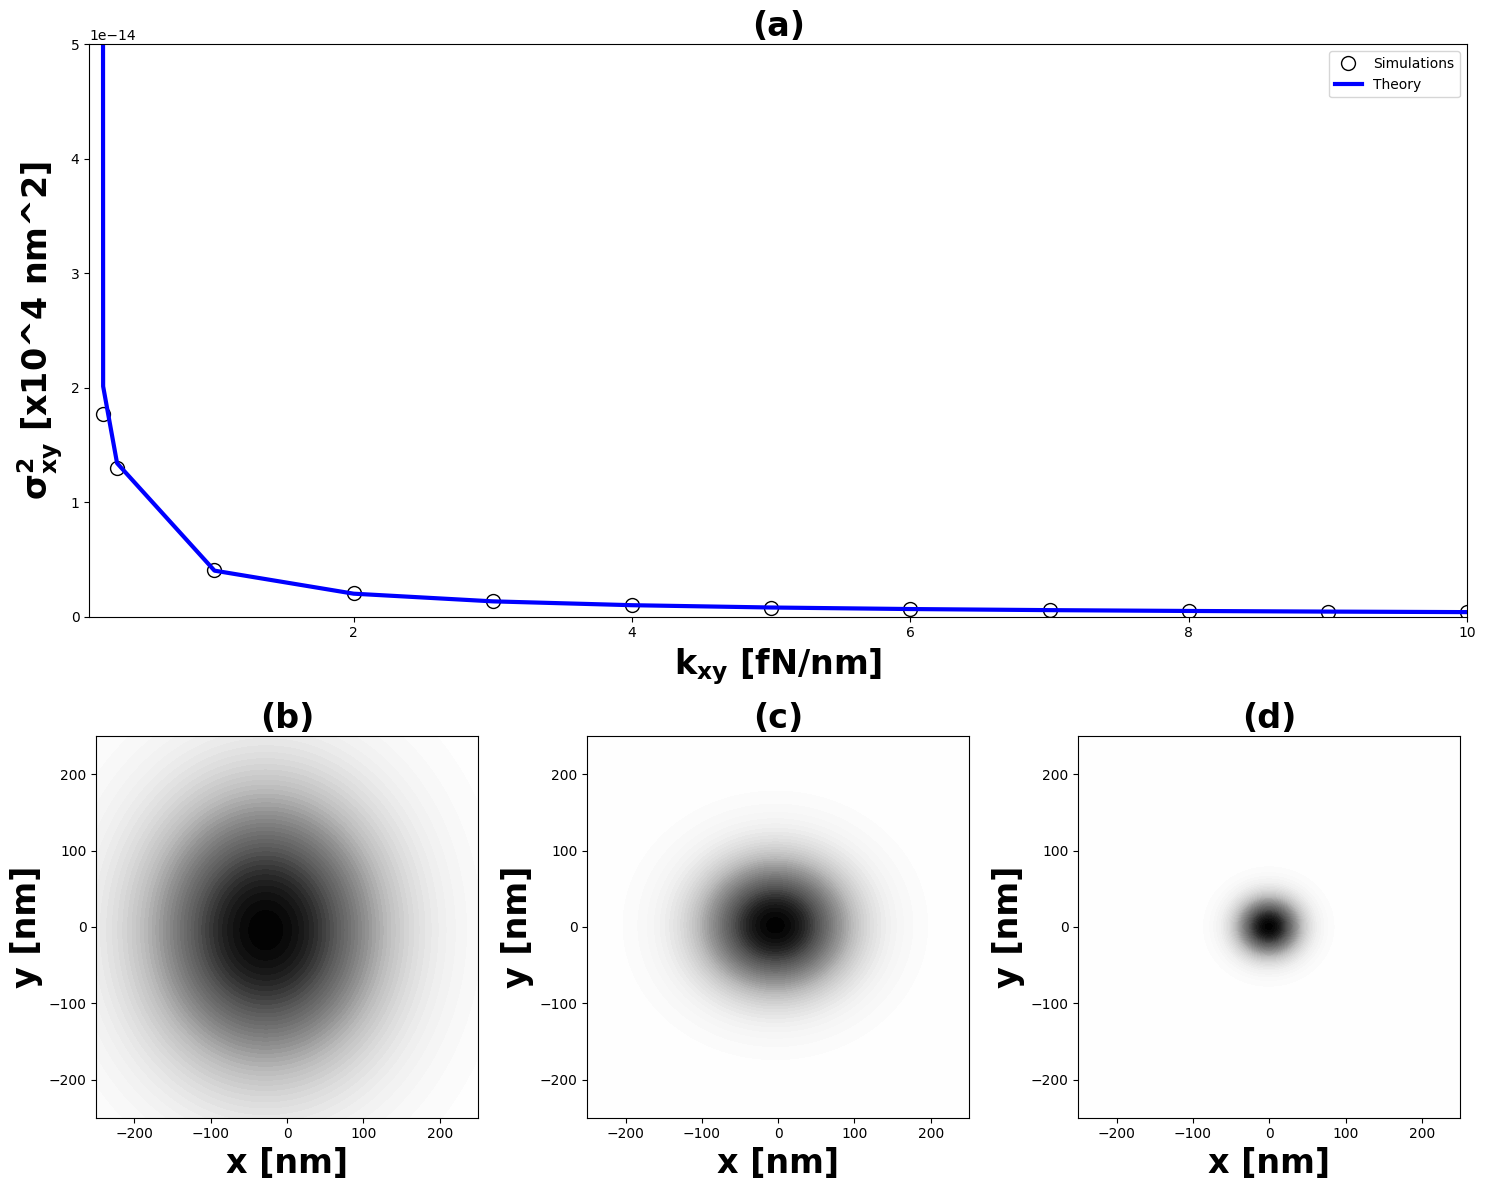

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.gridspec import GridSpec
from scipy.optimize import minimize_scalar

def trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky, kz):
    kB = 1.38e-23  # Boltzmann constant [J/K]
    gamma = 6 * np.pi * R * eta  # friction coefficient
    D = kB * T / gamma  # diffusion coefficient

    np.random.seed(555)

    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)

    x[0], y[0], z[0] = x1, y1, z1  # initial conditions

    for i in range(1, N):
        # Deterministic step
        x[i] = x[i - 1] - kx * Dt / gamma * x[i - 1]
        y[i] = y[i - 1] - ky * Dt / gamma * y[i - 1]
        z[i] = z[i - 1] - kz * Dt / gamma * z[i - 1]

        # Diffusive step
        x[i] += np.sqrt(2 * D * Dt) * np.random.randn()
        y[i] += np.sqrt(2 * D * Dt) * np.random.randn()
        z[i] += np.sqrt(2 * D * Dt) * np.random.randn()

    t = np.arange(0, N * Dt, Dt)
    return x, y, z, t



# Define the parameters
N = 100000
Dt = 1e-5
x1 = y1 = z1 = 0
R = 1e-6
T = 300
eta = 0.001
kz = 0.2e-6
kx = ky = 1e-6


# Call the function
x, y, z, t = trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky, kz)


# Define the function to run the simulation with different kxy values and calculate the variance
def simulation_variance(kxy_values, N, Dt, x1, y1, z1, R, T, eta, kz):
    variances = []
    
    for kxy in kxy_values:
        # Run the simulation
        x, y, z, t = trapped(N, Dt, x1, y1, z1, R, T, eta, kxy, kxy, kz)
        
        # Calculate variance in the y-plane
        variance_y = np.var(y)
        variances.append(variance_y)
    
    return variances


# Specific kxy values 

kxy_values_additional = np.linspace(10e-6, 20e-6, 10)
kxy_values0 = (0.0005e-6, 0.2e-6, 0.3e-6, 1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6)
kxy_values1 = np.array(kxy_values0)

kxy_values = np.concatenate((kxy_values1, kxy_values_additional))



# Run the simulations
variances = simulation_variance(kxy_values, N, Dt, x1, y1, z1, R, T, eta, kz)

C = kxy_values[6] * variances[6]
theoretical_variances = C / kxy_values


# Trap stiffness values for subplots (b), (c), and (d)
k_values = [(0.2e-6, 0.2e-6), (1e-6, 1e-6), (5e-6, 5e-6)]

# Creating the figure 
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(2, 3, figure=fig, height_ratios=[3, 2])

# (a) Variance against kxy_values
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(kxy_values*10**(6), variances , label='Simulations', marker='o', color= 'black', markersize = 10 , markerfacecolor='none', linestyle='None')
ax0.plot(kxy_values*10**(6), theoretical_variances, linewidth = 3, color='blue', label='Theory', alpha = 1)
ax0.set_ylim([0, 5*10**(-14)])
ax0.set_xlim([0.1, 10])
ax0.set_xlabel(r'$\mathbf{k_{xy}}$ [fN/nm]', fontweight="bold", fontsize=24)
ax0.set_ylabel(r'$\mathbf{\sigma_{xy}^2}$ [x10^4 nm^2]', fontweight="bold", fontsize=24)
ax0.legend()
ax0.set_title("(a)", fontweight= "bold", fontsize=24)

# Subplots for (b), (c), and (d)
for i, (kx, ky) in enumerate(k_values):
    ax = fig.add_subplot(gs[1, i])  


    x, y, z, t = trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky, kz) 

    # Calculate the mean and standard deviation for x and y
    mean_x, std_x = norm.fit(x)
    mean_y, std_y = norm.fit(y)

    # Create a grid of (x, y) coordinates
    x_grid = np.linspace(-300e-9, 300e-9, 200)
    y_grid = np.linspace(-300e-9, 300e-9, 200)

    X, Y = np.meshgrid(x_grid, y_grid)

    # Calculate the Gaussian distribution on this grid
    X_Y = norm.pdf(X, mean_x, std_x) * norm.pdf(Y, mean_y, std_y)

    # Contour plot for the ith k_values
    ax.contourf(X * 10**9, Y * 10**9, X_Y, levels=50, cmap='Greys')
    ax.set_xlabel('x [nm]', fontweight= "bold", fontsize=24)
    ax.set_ylabel('y [nm]', fontweight= "bold", fontsize=24)
    ax.set_xlim([-250, 250])
    ax.set_ylim([-250, 250])
    ax.set_aspect('equal')
    ax.set_title(f"({chr(98+i)})", fontweight= "bold", fontsize=24)


plt.tight_layout()

plt.show()


In [57]:
variances


[3.0920803760650346e-14,
 2.547307926350748e-14,
 1.7669319828862324e-14,
 1.3025466852479724e-14,
 3.0920803760650346e-14,
 4.1236752601635885e-15,
 2.0517939499325625e-15,
 2.0517939499325625e-15,
 1.3546711946982845e-15,
 1.0062812376763065e-15,
 7.990254918440366e-16,
 6.624590853660405e-16,
 5.660763554097514e-16,
 4.945723922653954e-16,
 4.3946431550709927e-16]